# INPUT

In [18]:
###  INPUT ###
import pandas as pd
input_data = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')

# Data preprocessing

In [17]:
input_data.head()

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1347.554178,202.133127,4711.308821,5936.249114,0.000000,0.0000,190.168990,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,69.899353,10.484903,271.379890,341.938662,0.000000,0.0000,0.000000,0.000000,0.0
3,DBSF1059,20221003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,412.225065,61.833760,1539.505534,1939.776973,253.744916,149.7095,0.000000,0.000000,0.0
4,DBSF1059,20221004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,590.608634,88.591295,2614.973165,3294.866187,3032.885084,1789.4022,1.149739,13.428955,0.0


In [9]:
input_data.shape # 총 84840개의 데이터

(84840, 47)

In [ ]:
input_data.info() # 일단 null은 없음 / 0으로 있겠지

In [25]:
# 시각화에 필요한 라이브러리 임포트
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 내부에 결과를 출력하도록 설정
%matplotlib inline
# 시각화 한글 폰트 설정
# 윈도우 사용자
plt.rc('font', family='Malgun Gothic')
# Mac 사용자
#plt.rc('font', family='AppleGothic')
# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)
# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore')


# 시각화 시작

In [26]:
# 타깃 변수의 이름 (바꿔야 하는 부분)
target_column = 'outtrn_cumsum'

train_data = input_data.copy()  # 학습 데이터 복사본 생성
df = pd.DataFrame(train_data) # df사용하는 경우도 있음

In [ ]:
# 각 열별로 채워진 값 수 세기
count_of_zeros_per_column = (df != 0).sum()
print("각 열별 0이 아닌 값의 수:")
print(count_of_zeros_per_column)


<모두 0인 피처 및 거의 모두 0인 피처>
1. 모두 0
    daysuplyqy  일 급액량
    lefstalklt  엽병장(잇몸부분을 유지하는 자루 길이)
    frtstSetCo  착과 수
    pllnLt      초장
    flanJnt     개화된 마디
    hvstJnt     수확 마디
    flwrCo      꽃의 수
    frtstJnt    착과된 마디
2. 거의 0
    tcdmt     관부 직경 - 83400
    CO2Usage  CO2사용량(L) - 83700
    CO2Cost   CO2사용비용(원) - 83700


In [ ]:
#각 피처의 분포도 확인
plt.figure(figsize=(15, 15))
for i, col in enumerate(train_data.columns, 1):
    plt.subplot(24, 2, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(train_data[col], kde=True)
    plt.tight_layout()

# plt.show()를 호출하여 그래프를 보여줍니다.
plt.show()

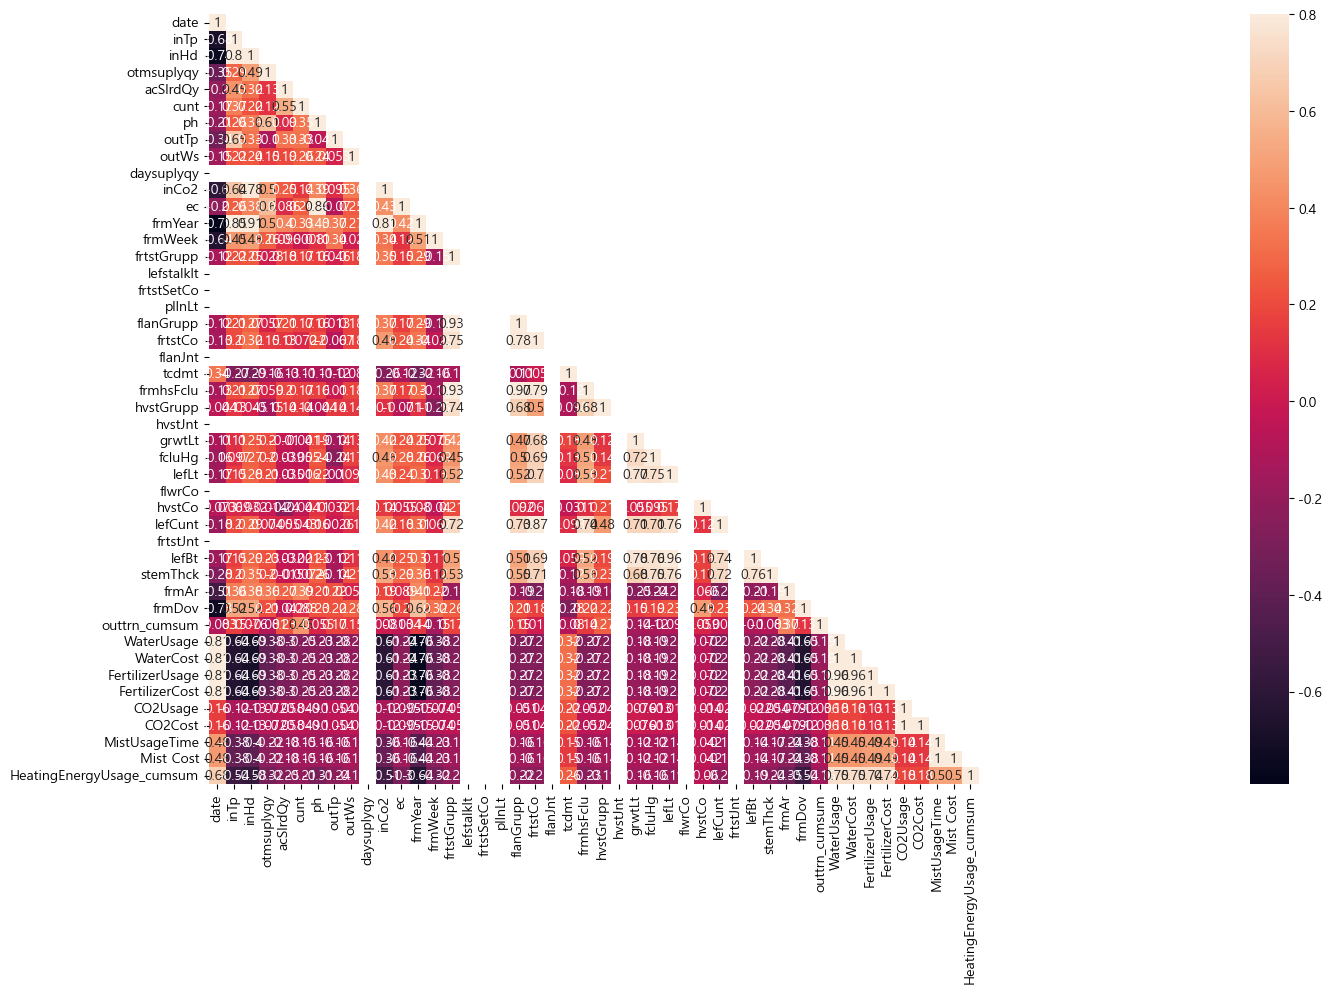

In [20]:
# 히트맵 분석
import numpy as np
# 목표 : outtrn_cumsum

corrMatt = train_data
corrMatt = corrMatt.corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(70,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

# 그래프 저장
plt.savefig("heatmap.png")  # 파일명은 원하는 대로 지정합니다.

# 모델링 시작

In [19]:
#    Write codes...
# ... (Data preprocessing code here)

#데이터셋 로드
input_data = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')


In [20]:
# 모델링 준비
import math
import numpy as np
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# 파라미터 튜닝 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# 대충 돌릴때 체크 : cross-val
from sklearn.model_selection import cross_val_score

# 평가
from sklearn.metrics import accuracy_score

In [21]:

# Split the data into training and testing sets

#X = input_data[input_data.drop(columns=['outtrn_cumsum','HeatingEnergyUsage_cumsum']).columns]
#Y = input_data[['outtrn_cumsum','HeatingEnergyUsage_cumsum']]
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 데이터 분할 (훈련 세트와 테스트 세트)
X = input_data[['ec', 'cunt', 'HeatingEnergyUsage_cumsum', 'hvstCo', 'frtstCo']]
y = input_data[['outtrn_cumsum', 'HeatingEnergyUsage_cumsum']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Initialize and train model

# 랜덤 포레스트 회귀 모델
#rf_model = RandomForestRegressor(random_state=42)

#randomized_search로 얻어낸 하이퍼파라미터 적용
new_rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=4,
    max_depth=10,
    random_state=42  # 필요한 경우 랜덤 시드 설정
)

# 그라디언트 부스팅 회귀 모델
gb_model = GradientBoostingRegressor(random_state=42)

# 앙상블 모델 생성 (랜덤 포레스트와 그라디언트 부스팅을 결합)
ensemble_model = VotingRegressor(estimators=[('RandomForest', rf_model), ('GradientBoosting', gb_model)])

# 앙상블 모델 학습
ensemble_model.fit(X_train, y_train)

# 앙상블 모델 예측
ensemble_predictions = ensemble_model.predict(X_test)

In [ ]:
#Grid 또는 Randomaized search 이용 - 하이퍼 파라미터 튜닝

# 랜덤 포레스트 회귀 모델
rf_model = RandomForestRegressor(random_state=42)

param_ = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 최대 트리 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소한의 샘플 개수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드에 필요한 최소한의 샘플 개수
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#random_search = RandomizedSearchCV(rf_model, param_, cv=5, n_iter=10) # n_iter개 조합을 랜덤으로 뽑아서 최적인 거 선정

best_model = grid_search.fit(X_train, y_train)
#best_model = random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터를 얻습니다.
# random 10개 결과 - 이거 거의 1시간 넘게 돌려서 얻음.. {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
print(best_model.best_params_)

In [ ]:
# 최적의 하이퍼파라미터를 사용하여 모델을 생성합니다.
best_model = RandomForestRegressor(**best_params)

# 최적 모델을 학습합니다.
best_model.fit(X_train, y_train)

# 최적 모델을 사용하여 예측을 수행합니다.
grid_predictions = best_model.predict(X_test)

grid_rmse = calculate_rmse(y_test, grid_predictions)
grid_r2score = calculate_R2_score(y_test, grid_predictions)  
print(f"grid RMSE: {grid_rmse:.2f}")
print(f"grid R^2 Score: {grid_r2score:.2f}")

In [7]:
# 개별 랜덤 포레스트 모델과 그 파라미터 그리드/랜덤을 정의합니다.
rf_model = RandomForestRegressor(random_state=42)
param_ = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV/RandomizedSearchCV 를 사용하여 개별 모델 파라미터 튜닝을 수행합니다.
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_, cv=5, scoring='neg_mean_squared_error')
#random_search = RandomizedSearchCV(extimator=rf_model, param_, cv=5, n_iter=10)

grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# 앙상블 모델을 생성하고 앙상블 파라미터 그리드를 정의합니다.
ensemble_model = VotingRegressor(estimators=[('RandomForest', best_rf_model)], n_jobs=-1)
ensemble_param_grid = {
    'weights': [[1, 1], [1, 2], [2, 1]]  # 개별 모델의 가중치
}

# GridSearchCV를 사용하여 앙상블 파라미터 튜닝을 수행합니다.
ensemble_grid_search = GridSearchCV(estimator=ensemble_model, param_grid=ensemble_param_grid, cv=5, scoring='neg_mean_squared_error')
ensemble_grid_search.fit(X_train, y_train)
best_ensemble_model = ensemble_grid_search.best_estimator_

# 최적의 앙상블 모델을 사용하여 예측을 수행합니다.
y_pred = best_ensemble_model.predict(X_test)

# 예측 결과를 평가합니다.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

C:\Users\ooooo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ooooo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ooooo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ooooo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

In [68]:
# Calculate RMSE between the predictions and actual 'y' values
def calculate_rmse(targets, predictions):
    """
    Calculate the Root Mean Squared Error (RMSE) between predicted and target values.

    :param predictions: Predicted values.
    :type predictions: array-like
    :param targets: Target values.
    :type targets: array-like
    :return: RMSE value.
    :rtype: float
    """
    rmse = np.sqrt(mean_squared_error(targets, predictions)) 
    return rmse # 가장 큰 값 리턴
    #from sklearn.metrics import mean_squared_error
    #return np.sqrt(mean_squared_error(targets, predictions))
   

# Calculate r2_score between the predictions and actual 'y' values
def calculate_R2_score(y_test,y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2 # 가장 큰값 리턴
    #from sklearn.metrics import r2_score
    #return r2_score(y_test, y_pred)

linear_rmse = calculate_rmse(y_test, y_predictions)
linear_r2score = calculate_R2_score(y_test, y_predictions)    
ensemble_rmse = calculate_rmse(y_test, ensemble_predictions)
ensemble_r2score = calculate_R2_score(y_test, ensemble_predictions)


# RMSE와 R^2 스코어 평가

print(f"linear RMSE: {linear_rmse:.2f}")
print(f"linear R^2 Score: {linear_r2score:.2f}")
print(f"Ensemble RMSE: {ensemble_rmse:.2f}")
print(f"Ensemble R^2 Score: {ensemble_r2score:.2f}")


linear RMSE: 33560.94
linear R^2 Score: 0.26
Ensemble RMSE: 32033.75
Ensemble R^2 Score: 0.32


In [69]:
### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)


RMSE: 32033.746060309655
R2_score: 0.3243009655667558


# 테스트들 - 여기서 자질구레한거 하고 위에다 적용시키자

In [ ]:
# 일단 뽑아주신 피처들만 넣어서 돌려보자

In [ ]:
# 두 피처간의 관계
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="outtrn_cumsum") #해당 열을 기준으로 각 데이터포인트를 색으로 구분
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [ ]:
# 히트맵 생성 테스트
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Heatmap 생성
sns.heatmap(data)

# 그래프 저장
plt.savefig("heatmap.png")  # 파일명은 원하는 대로 지정합니다.


In [ ]:
# 타이타닉 셋에 있던거 테스트
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')  # 학습시킬 데이터셋
#test = pd.read_csv('input/test.csv')    # 테스트를 시킬 데이터셋(survived 필드가 없음)

# 요일별 퇴근 시간 평균 탑승객 수 시각화
selected_features = ['ec', 'outtrn_cumsum']
train = train_data[selected_features]
sns.barplot(x="ec", y="outtrn_cumsum", data=train)
plt.title("요일에 따른 퇴근 시간 평균 탑승객 수")
plt.show()


In [ ]:
#Grid 또는 Randomaized search 이용 - 하이퍼 파라미터 튜닝

# 랜덤 포레스트 회귀 모델
rf_model = RandomForestRegressor(random_state=42)

param_ = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 최대 트리 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소한의 샘플 개수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드에 필요한 최소한의 샘플 개수
}

#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
random_search = RandomizedSearchCV(rf_model, param_, cv=5, n_iter=10) # n_iter개 조합을 랜덤으로 뽑아서 최적인 거 선정

#best_model = grid_search.fit(X_train, y_train)
best_model = random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터를 얻습니다. - 이거 거의 1시간 넘게 돌려서 얻음.. {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
print(best_model.best_params_)